<a href="https://colab.research.google.com/github/Murcha1990/AppliedDS_DPO_2024/blob/main/Lesson1_NLP1/AiEdu_Huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hugginface


Библиотека 🤗 Transformers была разработана для упрощения работы с большими и сложными моделями трансформеров, которые обладают миллионами и даже десятками миллиардов параметров.

Она обеспечивает унифицированный интерфейс для загрузки, обучения и сохранения различных моделей трансформеров, что значительно упрощает их тестирование и развертывание.

* Основными преимуществами библиотеки являются ее простота в использовании, позволяющая в несколько строк кода запускать современные NLP-модели, и гибкость, благодаря интеграции с популярными фреймворками машинного обучения, как PyTorch и TensorFlow.
* Каждая модель в 🤗 Transformers реализована в виде отдельных классов, соответствующих этим фреймворкам, что делает код легким для понимания и модификации.
* Важной особенностью является также то, что вся логика модели сосредоточена в одном файле, облегчая эксперименты и модификации без влияния на другие модели, что отличает 🤗 Transformers от других библиотек машинного обучения.

In [1]:
!pip install -qq transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## Использование моделей из библиотеки transformers

Есть два пути использования моделей:

* Применение готовой, предобученной модели и мгновенное получение результата

* Обучение или дообучение модели из библиотеки на своих данных

Начнем с fast-track - применение готовой модели без дообучения, as is.

## Pipelines

В трансформерах есть множество предобученных моделей для самых разных типов задач. Чтобы применить предобученную модель к сырому тексту, можно использовать конструкцию под названием `pipeline`.

Pipeline сочетает в себе:

* токенизацию текста (при помощи предобученной модели)

* применение предобученной модели для решения поставленной задачи.

In [2]:
from transformers import pipeline

# Allocate a pipeline for sentiment-analysis
classifier = pipeline('sentiment-analysis')

classifier('We are very happy to introduce pipeline to the transformers repository.')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9996980428695679}]

## Применение готовых моделей - демо

Теперь разбираться подробнее.

Посмотрим как применять предобученную модель Bert, а также как применять предобученный Bert-токенизатор.

`Cased` в названиях модели - важны большие/маленькие буквы. `Uncased` - неважны. Можно выбирать из [тысяч](https://huggingface.co/models) моделей - для разных задач и языков

In [3]:
from transformers import BertConfig, BertModel
from transformers import BertTokenizer

# Создание конфигурации
config = BertConfig()
print(config)
# Создание модели на основе конфигурации
model = BertModel(config)

model = BertModel.from_pretrained("bert-base-cased")

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [4]:
import torch

encoded_sequences = [
    [101, 1, 2, 3],
    [101, 4, 5, 6],
    [101, 7, 8, 9],
]

model_inputs = torch.tensor(encoded_sequences)
output = model(model_inputs)
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0550,  0.4889,  0.6843,  ...,  0.4833, -0.1339,  0.1375],
         [-0.3199,  0.2458,  0.9206,  ...,  0.2832, -0.0379, -0.0202],
         [-0.3361,  0.4504,  0.7557,  ...,  0.3800, -0.1795,  0.0087],
         [-0.2844,  0.5193,  0.7244,  ...,  0.3899, -0.1990, -0.0578]],

        [[-0.1662,  0.4021,  0.6357,  ...,  1.1998, -0.2972,  0.1872],
         [-0.1871, -0.2718,  0.4520,  ...,  0.5082,  0.1472, -0.0150],
         [-0.3827, -0.1240,  0.3554,  ...,  0.5148,  0.0864,  0.1534],
         [-0.2015,  0.4061,  0.6344,  ...,  1.1191, -0.2917,  0.1655]],

        [[ 0.0797,  0.4599,  0.7077,  ...,  0.7596, -0.1268,  0.1436],
         [-0.1902,  0.1036,  0.7702,  ...,  0.5177,  0.0821,  0.0061],
         [-0.2664,  0.3516,  0.8599,  ...,  0.7162, -0.1607, -0.0190],
         [ 0.0636,  0.4830,  0.7703,  ...,  0.7234, -0.1374,  0.1501]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.3868,  0.

Токенизация играет ключевую роль в процессе обработки естественного языка (NLP), выполняя задачу превращения текста в формат, с которым могут работать машины. Поскольку модели способны интерпретировать только числовые данные, токенизаторы необходимы для трансформации текстовых данных в числа. В этом разделе мы подробно изучим, как происходит этот процесс токенизации.

В контексте NLP обычно работают с исходным текстом. Задача токенизатора — найти такой метод преобразования, который будет наиболее информативен и компактен для модели, обеспечивая при этом сохранение смысловой нагрузки исходного текста.

In [7]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")




from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

tokenizer("Hello world!")

{'input_ids': [101, 8667, 1362, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [8]:
# Дополнение последовательностей до заданной максимальной длины
model_inputs = tokenizer(['Hello world', 'how are you'], padding="max_length", max_length=8, return_tensors="pt")
model_inputs

{'input_ids': tensor([[ 101, 8667, 1362,  102,    0,    0,    0,    0],
        [ 101, 1293, 1132, 1128,  102,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0]])}

In [9]:
print(tokenizer.decode(model_inputs["input_ids"][0]))

# decode without special tokens
print(tokenizer.decode(model_inputs["input_ids"][0], skip_special_tokens=True))

[CLS] Hello world [SEP] [PAD] [PAD] [PAD] [PAD]
Hello world


# Загрузка датасета, исследование данных и их обработка

In [10]:
!gdown --id 10dSjHPFHMo_1ibIFXKd2m6ncQITwlimG
!gdown --id 1SD5mxKGbiM5gYZKThenKncf1QzEldkqb

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10dSjHPFHMo_1ibIFXKd2m6ncQITwlimG
To: /content/negative_twitter.csv
100% 24.5M/24.5M [00:00<00:00, 28.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SD5mxKGbiM5gYZKThenKncf1QzEldkqb
To: /content/positive_twitter.csv
100% 26.2M/26.2M [00:00<00:00, 36.1MB/s]


In [11]:
import pandas as pd

pos_texts = pd.read_csv('positive_twitter.csv', encoding='utf8', sep=';', header=None)
neg_texts = pd.read_csv('negative_twitter.csv', encoding='utf8', sep=';', header=None)

df = pd.concat([pos_texts, neg_texts], axis=0)
df = df[[3, 4]]
df.columns = ['text', 'labels']
df.labels = df.labels.map({1: 1, -1: 0})
df.head()

<ipython-input-11-0944176ef492>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.labels = df.labels.map({1: 1, -1: 0})


,text,labels
0,"@first_timee хоть я и школота, но поверь, у на...",1
1,"Да, все-таки он немного похож на него. Но мой ...",1
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1
4,@irina_dyshkant Вот что значит страшилка :D\nН...,1


In [12]:
df.labels.value_counts()

,count
labels,
1,114911
0,111923


In [13]:
# перемешиваем и выбираем 20к примеров для скорости обучения
df = df.sample(frac=1.0).reset_index(drop=True)[:20000]

In [14]:
df.labels.value_counts()

,count
labels,
1,10095
0,9905


In [15]:
df.head()

,text,labels
0,"@maschokok а я-то думала, что пишу всякую хрен...",1
1,RT @Mr__belieber: @Jelenatorrrr у меня такое ...,1
2,"@feneamin блин, вот хотел сходить на него но с...",1
3,ехх молодість) Ваха і Бобер красавчікі хахахах...,1
4,@KARANDASH___ @grib_casa тяжелую работу не мен...,0


#### Очистка текста

In [16]:
!pip install -qq pymorphy2 pymorphy2-dicts-ru

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 88.3 MB/s eta 0:00:00


In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
import pandas as pd
import numpy as np
import re
import pymorphy2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure that nltk's stopwords are downloaded (you've done this)
nltk.download("stopwords")
russian_stopwords = stopwords.words("russian")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
# Функция для предобработки текста
def preprocess_text(text):
    # Приводим текст к нижнему регистру
    text = text.lower()

    # Удаляем никнеймы, хэштеги, URL-адреса и символы новой строки
    text = re.sub(r'@\w+|#[\w-]+|http\S+|\n', '', text)

    # Удаляем пунктуацию, не разделяя слова и знаки препинания
    text = re.sub(r'[^\w\s]', '', text)

    # Токенизируем текст для более точного разделения на слова
    words = word_tokenize(text, language='russian')

    # Фильтрация слов, состоящих только из подчеркиваний
    words = [word for word in words if not re.match(r'^_+$', word)]

    # Инициализация списка для нормализованных слов
    processed_words = []

    for word in words:
        try:
            # Нормализация слова
            p = morph.parse(word)[0]
            word = p.normal_form
        except:
            # Если нормализация не удастся, используем исходное слово
            pass

        # Исключение стоп-слов можно сделать опциональным т.к. иногда искажает смысл
        # if word not in russian_stopwords:
        processed_words.append(word)

    # Соединяем обработанные слова в строку
    return ' '.join(processed_words)

for i in np.random.randint(0, len(df), 5):
    print('Ориг:', df['text'][i])
    print('Чист:', preprocess_text(df['text'][i]), '\n')

Ориг: Хочу спаааать, но мне надо идти в больницуу:(
Чист: хочу спаааать но мне надо идти в больницуу 

Ориг: Болеть, когда все готовятся к празднику - не гуд :(
Чист: болеть когда все готовятся к празднику не гуд 

Ориг: @CheeseInTheDark ну я не ебу как они называются(
Чист: ну я не ебу как они называются 

Ориг: Очень порадовал фильм на литературе!)))особенно земочка 
Чист: очень порадовал фильм на литературеособенно земочка 

Ориг: чай, таблетки, теплые носки и шарф
опять простуда((
Чист: чай таблетки теплые носки и шарфопять простуда 



In [21]:
df_cleared = df.copy()
df_cleared['text'] = df['text'].apply(preprocess_text)

In [22]:
df_cleared.sample(5)

,text,labels
3535,думаю уже можно признаться много воды утекло с...,1
16662,зима какоето особое настроения хочу на улицу п...,1
10892,раказахахаха я слишком люблю доту dddd,1
19375,повышеная концентрация анатолиев на квадратный...,1
1548,самое ужасное что на новый год я без любимого,0


In [23]:
df_cleared.to_csv('df_cleared.csv', index=False)

# Загрузка модели и подготовка датасета к обучению

`AutoModel` - класс для инициализации любой модели на основе заданной контрольной точки.

Класс AutoModel вместе с его производными представляет собой универсальные интерфейсы для обширного набора моделей, доступных в библиотеке. Главная его особенность заключается в способности автоматически определять, какая архитектура модели наилучшим образом соответствует предоставленной контрольной точке (заданной текстовым описанием), и создавать экземпляр соответствующей модели.

В случаях, когда вы точно знаете, какую модель желаете использовать, возможен прямой выбор и использование специализированного класса, который описывает ее архитектуру. Примером такой ситуации может служить работа с моделью BERT, когда непосредственно выбирается и применяется конкретный класс, отражающий ее структуру.

Пример полноценного конвейера обучения модели в hugginface

```
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification

# Так же, как и в прошлый раз
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = [
    "I've been waiting for a HuggingFace course my whole life.",
    "This course is amazing!",
]
batch = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")

# Эта часть новая
batch["labels"] = torch.tensor([1, 1])

optimizer = AdamW(model.parameters())
loss = model(**batch).loss
loss.backward()
optimizer.step()
```



In [ ]:
# какие-то конфликты с либами выше, можно не обращать внимания
!pip install pyarrow==11.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 11.0.0 which is incompatible.
datasets 2.19.1 requires pyarrow>=12.0.0, but you have pyarrow 11.0.0 which is incompatible.


### Загрузка модели

В нашей работе рассмотрим [T5](https://huggingface.co/ai-forever/ruT5-base) . Модель небольшого размера, что самое важное для нашего учебного примера, при этом обладает достаточными для решения задачи метриками.

В реально проекте пользуясь [фильтрами](https://huggingface.co/models?pipeline_tag=text-classification&language=ru&sort=downloads) можно выбрать SOTA для языка, преобладающего в вашем датасете.

In [24]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
import torch

model_name = "ai-forever/ruT5-base"
# model_name = "distilbert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(model_name)
# если уже есть предобученная модель - можно указать название папки с бинарником и конфигами
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

tokenizer_config.json:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at ai-forever/ruT5-base and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

T5ForSequenceClassification(
  (transformer): T5Model(
    (shared): Embedding(32128, 768)
    (encoder): T5Stack(
      (embed_tokens): Embedding(32128, 768)
      (block): ModuleList(
        (0): T5Block(
          (layer): ModuleList(
            (0): T5LayerSelfAttention(
              (SelfAttention): T5Attention(
                (q): Linear(in_features=768, out_features=768, bias=False)
                (k): Linear(in_features=768, out_features=768, bias=False)
                (v): Linear(in_features=768, out_features=768, bias=False)
                (o): Linear(in_features=768, out_features=768, bias=False)
                (relative_attention_bias): Embedding(32, 12)
              )
              (layer_norm): T5LayerNorm()
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (1): T5LayerFF(
              (DenseReluDense): T5DenseActDense(
                (wi): Linear(in_features=768, out_features=3072, bias=False)
                (wo): Linear(in_feat

### Подготовка датасета

In [29]:
from datasets import load_dataset #, load_metric
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, AdamW, get_scheduler

In [30]:
full_dataset = load_dataset('csv', data_files='df_cleared.csv')
# Фильтрация записей, в которых текстовые поля или метки не являются None
full_dataset = full_dataset.filter(lambda example: example['text'] is not None and example['labels'] is not None)

full_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 19997
    })
})

In [31]:
tokenizer.tokenize(full_dataset['train'][1]['text'])

['▁', 'rt', '▁у', '▁меня', '▁такое', '▁же', '▁время']

In [32]:
# разделим на обучающую и тестовую
dataset = full_dataset['train'].train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 15997
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 4000
    })
})

In [33]:
import pandas as pd

pd.Series(dataset['test']['labels']).value_counts()

,count
0,2002
1,1998


In [ ]:
# визуализируем один пример
dataset['train'][0]

{'text': 'сейчас я в школуа он будет домая ему завидую', 'labels': 0}

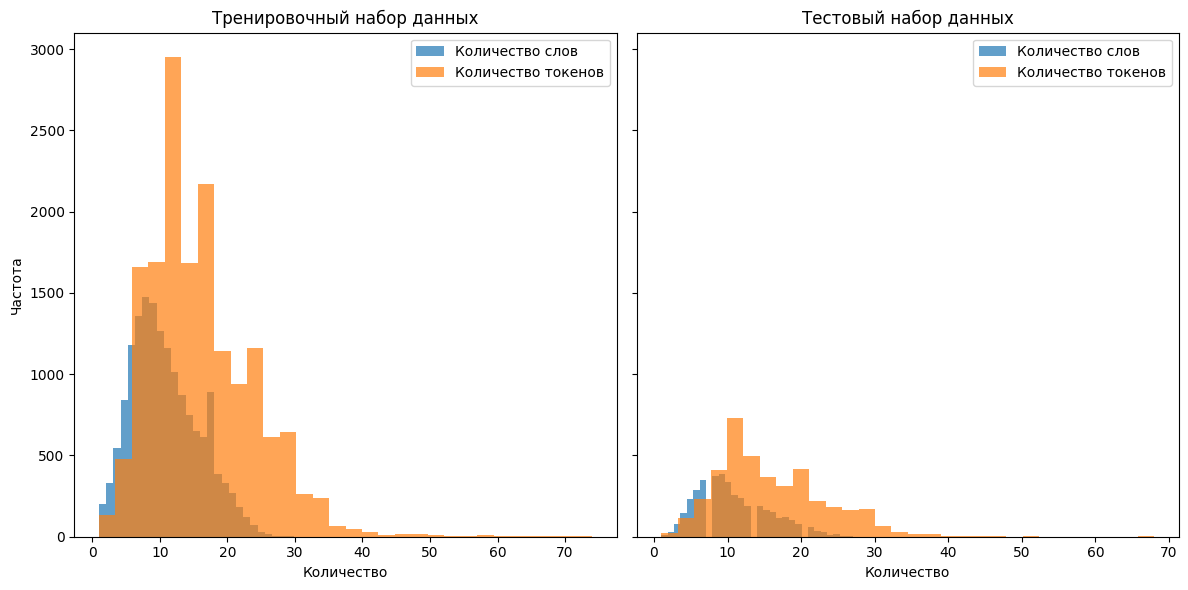

In [ ]:
import matplotlib.pyplot as plt

# Подсчет количества слов и токенов с использованием токенизатора
train_word_counts = [len(example['text'].split()) for example in dataset['train']]

train_token_counts = [len(tokenizer.tokenize(example['text'])) for example in dataset['train']]

test_word_counts = [len(example['text'].split()) for example in dataset['test']]
test_token_counts = [len(tokenizer.tokenize(example['text'])) for example in dataset['test']]

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Гистограмма для тренировочного набора данных
axes[0].hist(train_word_counts, bins=30, alpha=0.7, label='Количество слов')
axes[0].hist(train_token_counts, bins=30, alpha=0.7, label='Количество токенов')
axes[0].set_title('Тренировочный набор данных')
axes[0].set_xlabel('Количество')
axes[0].set_ylabel('Частота')
axes[0].legend()

# Гистограмма для тестового набора данных
axes[1].hist(test_word_counts, bins=30, alpha=0.7, label='Количество слов')
axes[1].hist(test_token_counts, bins=30, alpha=0.7, label='Количество токенов')
axes[1].set_title('Тестовый набор данных')
axes[1].set_xlabel('Количество')
axes[1].legend()

plt.tight_layout()
plt.show()

In [34]:
dataset = dataset.map(lambda e:
                      tokenizer(e['text'],
                                truncation = True,
                                max_length=80,
                                padding='max_length'), batched=True)

Map:   0%|          | 0/15997 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

In [35]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 15997
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'attention_mask'],
        num_rows: 4000
    })
})

In [36]:
# текст был успешно закодирован, более он нам не нужен
dataset = dataset.remove_columns('text')

In [37]:
# переносим на гпу
dataset.set_format(type='torch', device='cuda')

In [38]:
import torch
from torch.utils.data import DataLoader

# создаем загрузчики данных
train_dataloader = DataLoader(dataset['train'], shuffle=True, batch_size=16)
test_dataloader = DataLoader(dataset['test'], shuffle=False, batch_size=8)

Что подается на вход модели?

- **input ids**: последовательность чисел, отождествляющих каждый токен с его номером в словаре.
- **labels**: (в случае обучения) вектор из нулей и единиц. В нашем случае нули обозначают негативную эмоциональную окраску, единицы - положительную.
- **segment mask**: (необязательно) последовательность нулей и единиц, которая показывает, состоит ли входной текст из одного или двух предложений. Для случая одного предложения получится вектор из одних нулей. Для двух: <length_of_sent_1> нулей и <length_of_sent_2> единиц.
- **attention mask**: (необязательно) последовательность нулей и единиц, где единицы обозначают токены предложения, нули - паддинг.

In [ ]:
next(iter(train_dataloader))

{'labels': tensor([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], device='cuda:0'),
 'input_ids': tensor([[  466,  9820, 18265,  ...,     0,     0,     0],
         [   82,  4339,  5055,  ...,     0,     0,     0],
         [    8, 16121,   798,  ...,     0,     0,     0],
         ...,
         [   27,    61,    50,  ...,     0,     0,     0],
         [  152,  7491,  4359,  ...,     0,     0,     0],
         [   81,  3953,     5,  ...,     0,     0,     0]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0')}

# Инициализация и обучение модели

In [39]:
from transformers import AdamW, get_scheduler

# оптимизатор AdamW, лр стоит поперебирать
optimizer = AdamW(model.parameters(), lr=1e-4)
# количество эпох можно побольше поставить
num_epochs = 3
# количество шагов
num_training_steps = num_epochs * len(train_dataloader)

# будем линейно увеличивать первые 200 шагов
lr_scheduler = get_scheduler(
    "cosine",
    optimizer=optimizer,
    num_warmup_steps= int(0.1 * num_epochs * len(train_dataloader)), # ~10% от общего числа шагов оптимально
    num_training_steps=num_training_steps
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [41]:
!pip install evaluate

import evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Импортируем необходимые библиотеки
import numpy as np
import torch
from tqdm.auto import tqdm
from tqdm.notebook import tqdm

# Задаем начальное значение лучшего F1
best_f1 = 0.

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'

running_loss = []
# Проходимся по всем эпохам
for epoch in range(num_epochs):
    print(40*'-', f'\nEpoch {epoch+1}')

    # Переводим модель в режим обучения
    model.train()
    pbar = tqdm(train_dataloader, total=len(train_dataloader), desc='Training')

    # Итерируемся по данным для обучения
    for i, batch in enumerate(pbar):
        # Переводим данные на gpu
        batch = {k: v.to(device) for k, v in batch.items()}

        # Получаем прогнозы и потери от модели
        outputs = model(**batch)
        loss = outputs.loss

        # Выполняем обратное распространение и шаг оптимизатора
        loss.backward()
        optimizer.step()
        lr_scheduler.step()  # Обновляем планировщик скорости обучения
        optimizer.zero_grad()  # Очищаем градиенты

        running_loss.append(loss.item())
        pbar.set_postfix({'running_loss': np.mean(running_loss[-25:])})

    # Валидация модели
    print('\nValidating...')
    model.eval()  # Переводим модель в режим валидации

    # Инициализируем метрики
    f1 = evaluate.load('f1', trust_remote_code=True)
    acc = evaluate.load('accuracy', trust_remote_code=True)
    precision = evaluate.load('precision', trust_remote_code=True)
    recall = evaluate.load('recall', trust_remote_code=True)

    val_loss = []

    pbar = tqdm(test_dataloader, total=len(test_dataloader), desc='Validation')
    # Итерируемся по валидационным данным
    for batch in tqdm(pbar):
        # Переводим данные на gpu
        batch = {k: v.to(device) for k, v in batch.items()}

        with torch.no_grad():  # Выполняем без расчета градиентов
            outputs = model(**batch)

        logits = outputs.logits.detach().cpu()
        predictions = torch.argmax(logits, dim=-1)

        # Обновляем метрики
        f1.add_batch(predictions=predictions, references=batch["labels"].detach().cpu())
        acc.add_batch(predictions=predictions, references=batch["labels"].detach().cpu())
        precision.add_batch(predictions=predictions, references=batch["labels"].detach().cpu())
        recall.add_batch(predictions=predictions, references=batch["labels"].detach().cpu())

        # Сохраняем потери
        val_loss.append(outputs.loss.item())
        pbar.set_postfix({'val_loss': np.mean(val_loss[-25:])})

    # Выводим итоги по метрикам
    print('Weighted Summary:')
    test_acc = acc.compute()['accuracy']
    test_precision = precision.compute(average='weighted')['precision']
    test_recall = recall.compute(average='weighted')['recall']
    f1_weighted = f1.compute(average='weighted')['f1']
    print(f'[{epoch+1}] Test Accuracy: {test_acc:.4f}')
    print(f'[{epoch+1}] Test Precision: {test_precision:.4f}')
    print(f'[{epoch+1}] Test Recall: {test_recall:.4f}')
    print(f'[{epoch+1}] Test F1: {f1_weighted:.4f}')

    # Сохраняем модель при улучшении F1
    if f1_weighted > best_f1:
        best_f1 = f1_weighted
        model.save_pretrained(f"best_model_nov_2021_f1_max={best_f1}_len=100")
        print(f"New best F1: {best_f1}. Model saved.")

---------------------------------------- 
Epoch 1


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Плато small bert модели и large T5 с большой выборкой на русском языке:

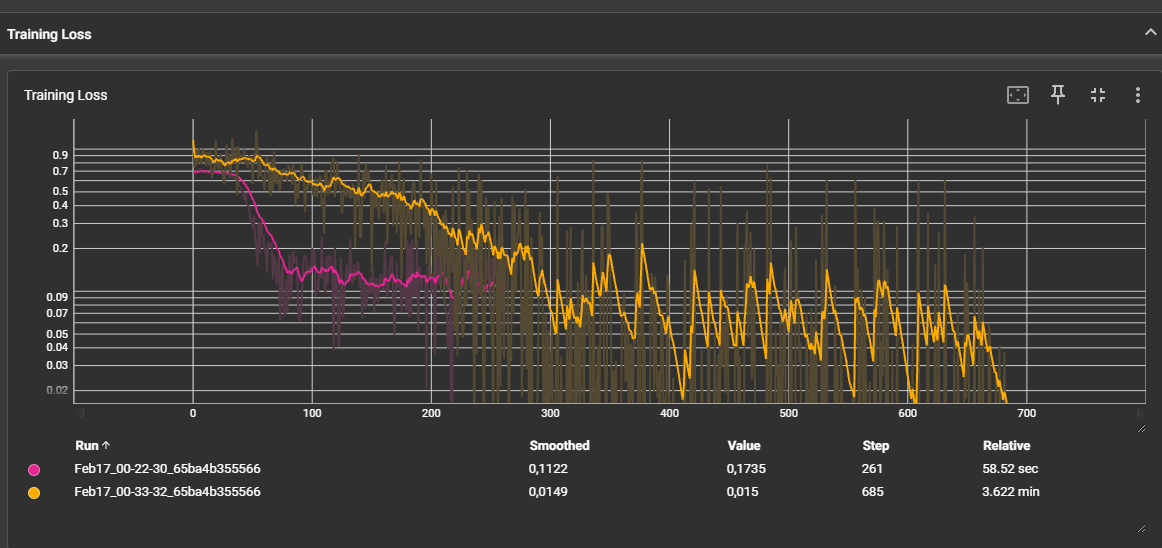

# обучение модели при помощи API-Trainer

Унифицированный класс Trainer необходим для тренировки моделей для разных задачах NLP и не только. Встроенных аргументов достаточно [много](https://huggingface.co/docs/transformers/main_classes/trainer#transformers.Trainer). Фактический код, использующий Trainer, будет таким же, как и раньше; единственные изменения - это функция вычисления метрики.

In [ ]:
! pip install -U accelerate
! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)


In [ ]:
from transformers import Trainer, TrainingArguments
from datasets import load_metric

# Загрузка метрики вне функции
f1_metric = load_metric("f1")

# Параметры обучения
training_args = TrainingArguments(
    output_dir="./results",  # Каталог для сохранения результатов обучения
    num_train_epochs=3,  # Количество эпох обучения
    per_device_train_batch_size=8,  # Размер батча для обучения
    per_device_eval_batch_size=8,  # Размер батча для валидации
    warmup_steps=500,  # Количество шагов разогрева
    weight_decay=0.01,  # Сила L2 регуляризации
    logging_dir="./runs",  # Каталог для логов TensorBoard
    logging_steps=500,  # Логирование каждые 500 шагов
    evaluation_strategy="epoch",  # Стратегия оценки
    save_strategy="epoch",  # Стратегия сохранения модели
    load_best_model_at_end=True,  # Загрузка лучшей модели в конце
    metric_for_best_model="f1",  # Метрика для выбора лучшей модели
    greater_is_better=True,  # Указывает, что большее значение F1 лучше
)

# Функция для вычисления метрик
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return f1_metric.compute(predictions=predictions, references=labels, average="binary")

trainer = Trainer(
    model=model,  # Модель для обучения
    args=training_args,  # Аргументы обучения
    train_dataset=dataset["train"],  # Набор данных для обучения
    eval_dataset=dataset["test"],  # Набор данных для валидации
    compute_metrics=compute_metrics,  # Метрики для вычисления
)

In [ ]:
# Запускаем обучение
trainer.train()